In [96]:
import os
import pandas as pd
import numpy as np
sorted(os.listdir("../raw-openimages/annotations"))

['aws',
 'awscliv2.zip',
 'class-descriptions-boxable.csv',
 'images',
 'oidv6-relationships-description.csv',
 'oidv6-train-annotations-bbox.csv',
 'test-annotations-bbox.csv',
 'test-annotations-object-segmentation.csv',
 'test-images-with-rotation.csv',
 'test-masks-8.zip',
 'train-annotations-object-segmentation.csv',
 'train-images-boxable-with-rotation.csv',
 'train-masks-2.zip',
 'train-masks-3.zip',
 'validation-annotations-bbox.csv',
 'validation-annotations-object-segmentation.csv',
 'validation-images-with-rotation.csv']

In [21]:
label_names_df = pd.read_csv("../raw-openimages/annotations/class-descriptions-boxable.csv", header=None)
label_names = label_names_df.loc[label_names_df[1].isin(["Alpaca", "Camel"]), 0].values

In [100]:
test_df = pd.read_csv("../raw-openimages/annotations/test-annotations-bbox.csv")
test_df_ = test_df[test_df.LabelName.isin(label_names)]

val_df = pd.read_csv("../raw-openimages/annotations/validation-annotations-bbox.csv")
val_df_ = val_df[val_df.LabelName.isin(label_names)]

train_df = pd.read_csv("../raw-openimages/annotations/oidv6-train-annotations-bbox.csv")
train_df_ = train_df[train_df.LabelName.isin(label_names)]

In [101]:
train_df_.shape, test_df_.shape, val_df_.shape

((2169, 21), (225, 13), (65, 13))

In [102]:
train_df_.ImageID.apply(lambda x: x[0]).values.shape

(2169,)

In [103]:
train = pd.read_csv("../raw-openimages/annotations/train-images-boxable-with-rotation.csv")

In [104]:
train.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [328]:
from tqdm.notebook import tqdm
import requests
from PIL import Image
from io import BytesIO



savedir = "../camelids"
if not os.path.exists(savedir):
    os.makedirs(savedir)
    
    
def download_file(url, target_path):
    r = requests.get(url)
    if r.status_code == requests.codes.ok and r.headers['Content-Type'].find("image") >= 0:
        #print(r.headers)
        image = Image.open(BytesIO(r.content))
        image.save(target_path)
        #with open(target_path, 'wb') as f:
        #    f.write(r.content)
    else:
        print(url, r.status_code)

def download_from_df(df, savedir):    
    for image_id, url, url2 in tqdm(df[["ImageID", "OriginalURL", "OriginalLandingURL"]].values):
        path = os.path.join(savedir, f"{image_id}_orig.png")
        if not os.path.exists(path):
            download_file(url, path)

        #path2 = os.path.join(savedir, f"{image_id}_small.png")
        #if not os.path.exists(path2):
        #    download_file(url2, path2)
    #break

In [329]:
train_df = train_df_.merge(train[["ImageID", "OriginalURL", "OriginalLandingURL"]], on="ImageID")
train_df.to_csv("train_camels.csv", index=None)

In [330]:
download_from_df(train_df, savedir)

https://farm4.staticflickr.com/3142/2953270602_9020154b4f_o.jpg 410
https://farm5.staticflickr.com/1034/1462756015_6504f1640c_o.jpg 410
https://c3.staticflickr.com/4/3534/3698094971_87610c96c9_o.jpg 404
https://farm7.staticflickr.com/3261/2408137522_68cbfe5064_o.jpg 404
https://c1.staticflickr.com/2/1328/1482477164_1b3bd14002_o.jpg 404
https://farm5.staticflickr.com/7122/7861701248_159e33713f_o.jpg 404
https://farm5.staticflickr.com/7122/7861701248_159e33713f_o.jpg 404
https://c7.staticflickr.com/9/8207/8251947028_22a6a931ed_o.jpg 404
https://c7.staticflickr.com/9/8207/8251947028_22a6a931ed_o.jpg 404
https://c4.staticflickr.com/3/2893/10695216823_27f2052230_o.jpg 410
https://farm4.staticflickr.com/3113/3102966010_53893ec2cd_o.jpg 404
https://c3.staticflickr.com/4/3900/14847362450_73a8dd9ea6_o.jpg 404
https://c3.staticflickr.com/4/3900/14847362450_73a8dd9ea6_o.jpg 404
https://farm4.staticflickr.com/5214/5532953590_54b09a9b8a_o.jpg 404
https://farm4.staticflickr.com/5214/5532953590_54b09

https://farm5.staticflickr.com/5124/5280385290_555acc8b3e_o.jpg 410
https://farm5.staticflickr.com/5124/5280385290_555acc8b3e_o.jpg 410
https://c2.staticflickr.com/9/8350/8250878239_20d3dec1a6_o.jpg 404
https://c2.staticflickr.com/9/8350/8250878239_20d3dec1a6_o.jpg 404
https://farm5.staticflickr.com/5532/10045353024_f48ef79a6a_o.jpg 404
https://farm2.staticflickr.com/8539/8618804176_94edf94bf9_o.jpg 404



In [331]:
test = pd.read_csv("../raw-openimages/annotations/test-images-with-rotation.csv")
test_df = test_df_.merge(test, on="ImageID")[["ImageID", "OriginalURL", "OriginalLandingURL"]]
test_df.to_csv("test_camels.csv", index=None)
download_from_df(test_df, savedir)

https://c2.staticflickr.com/4/3842/14968807370_a78d7da4cc_o.jpg 404
https://c2.staticflickr.com/4/3842/14968807370_a78d7da4cc_o.jpg 404
https://c4.staticflickr.com/7/6080/6098889038_cc2d77d44c_o.jpg 404
https://c4.staticflickr.com/7/6080/6098889038_cc2d77d44c_o.jpg 404
https://c6.staticflickr.com/3/2427/3705235777_4fd77535dc_o.jpg 404
https://c7.staticflickr.com/2/1261/1041674033_6b60d8acc3_o.jpg 404
https://c7.staticflickr.com/2/1261/1041674033_6b60d8acc3_o.jpg 404



In [332]:
val = pd.read_csv("../raw-openimages/annotations/validation-images-with-rotation.csv")

In [333]:
val_df = val_df_.merge(val, on="ImageID")[["ImageID", "OriginalURL", "OriginalLandingURL"]]
val_df.to_csv("val_camels.csv", index=None)

In [334]:
download_from_df(val_df, savedir)

https://farm3.staticflickr.com/5030/5648881129_c1254809bb_o.jpg 410
https://farm3.staticflickr.com/5030/5648881129_c1254809bb_o.jpg 410
https://c3.staticflickr.com/8/7464/16037859167_25940c7ac9_o.jpg 404
https://c7.staticflickr.com/4/3270/2865533842_565ed1c0d6_o.jpg 404
https://c7.staticflickr.com/4/3270/2865533842_565ed1c0d6_o.jpg 404



In [335]:
train_anno_df = pd.read_csv("../raw-openimages/annotations/train-annotations-object-segmentation.csv")
train_anno_df= train_anno_df.loc[train_anno_df.LabelName.isin(label_names), ["MaskPath", "ImageID", "LabelName"]]

In [336]:

train_anno_df = train_df[["ImageID", "OriginalURL", "OriginalLandingURL"]].merge(train_anno_df, on="ImageID")
train_anno_df.to_csv("train_anno.csv", index=None)
train_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y,OriginalURL,OriginalLandingURL
0,000151d10b95b4d3,xclick,/m/0pcr,1,0.105625,0.999375,0.084586,0.999060,0,1,...,0.325000,0.999375,0.643125,0.105625,0.084586,0.783835,0.999060,0.299812,https://farm4.staticflickr.com/1035/1474161379...,https://www.flickr.com/photos/theogeo/1474161379
1,002bdaf1c177effd,xclick,/m/01x_v,1,0.055000,0.222500,0.606403,0.775895,1,0,...,0.073750,0.055000,0.222500,0.217500,0.606403,0.617702,0.762712,0.775895,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322
2,002bdaf1c177effd,xclick,/m/01x_v,1,0.073125,0.260625,0.620527,0.861582,0,0,...,0.152500,0.073125,0.260625,0.228750,0.620527,0.649718,0.709981,0.861582,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322
3,002bdaf1c177effd,xclick,/m/01x_v,1,0.244375,0.370000,0.625235,0.803201,1,0,...,0.260000,0.244375,0.370000,0.339375,0.625235,0.652542,0.658192,0.803201,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322
4,002bdaf1c177effd,xclick,/m/01x_v,1,0.281250,0.389375,0.629002,0.818267,0,0,...,0.288125,0.281250,0.389375,0.335000,0.629002,0.643126,0.812618,0.818267,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,fe8715383493450b,xclick,/m/01x_v,1,0.483125,0.999375,0.109617,0.958305,1,0,...,0.546875,0.483125,0.999375,0.648750,0.109617,0.188299,0.743107,0.958305,https://c4.staticflickr.com/5/4054/4380923454_...,https://www.flickr.com/photos/suecan/4380923454
2165,fed99a9a48dcd704,xclick,/m/0pcr,1,0.000000,0.938477,0.000000,0.998682,0,1,...,0.456055,0.938477,0.603516,0.000000,0.000000,0.475626,0.998682,0.247694,https://farm5.staticflickr.com/154/416970619_a...,https://www.flickr.com/photos/devcentre/416970619
2166,ff131145d5705309,xclick,/m/01x_v,1,0.221250,0.792500,0.310442,0.875823,1,0,...,0.291875,0.221250,0.792500,0.378750,0.310442,0.392286,0.673565,0.875823,https://c2.staticflickr.com/8/7556/16119664639...,https://www.flickr.com/photos/64141731@N03/161...
2167,ffb17c331c268d1f,xclick,/m/01x_v,1,0.025065,0.888505,0.120795,0.998471,1,1,...,0.821089,0.025065,0.888505,0.789110,0.120795,0.660550,0.804281,0.998471,https://c8.staticflickr.com/3/2465/3619844091_...,https://www.flickr.com/photos/26010780@N06/361...


In [337]:
test_anno_df = pd.read_csv("../raw-openimages/annotations/test-annotations-object-segmentation.csv")
test_anno_df= test_anno_df.loc[test_anno_df.LabelName.isin(label_names), ["MaskPath", "ImageID", "LabelName"]]


test_anno_df = test_df.merge(test_anno_df, on="ImageID")
test_anno_df.to_csv("test_anno.csv", index=None)

In [338]:
val_anno_df = pd.read_csv("../raw-openimages/annotations/validation-annotations-object-segmentation.csv")
val_anno_df= val_anno_df.loc[val_anno_df.LabelName.isin(label_names), ["MaskPath", "ImageID", "LabelName"]]


val_anno_df = val_df.merge(val_anno_df, on="ImageID")
val_anno_df.to_csv("val_anno.csv", index=None)
val_anno_df

,ImageID,OriginalURL,OriginalLandingURL,MaskPath,LabelName
0,0379f766c7ae7d43,https://farm4.staticflickr.com/48/138401180_2b...,https://www.flickr.com/photos/girolame/138401180,0379f766c7ae7d43_m01x_v_acd02269.png,/m/01x_v
1,0379f766c7ae7d43,https://farm4.staticflickr.com/48/138401180_2b...,https://www.flickr.com/photos/girolame/138401180,0379f766c7ae7d43_m01x_v_1709e488.png,/m/01x_v
2,0379f766c7ae7d43,https://farm4.staticflickr.com/48/138401180_2b...,https://www.flickr.com/photos/girolame/138401180,0379f766c7ae7d43_m01x_v_acd02269.png,/m/01x_v
3,0379f766c7ae7d43,https://farm4.staticflickr.com/48/138401180_2b...,https://www.flickr.com/photos/girolame/138401180,0379f766c7ae7d43_m01x_v_1709e488.png,/m/01x_v
4,0808e99e1f3af0f4,https://farm5.staticflickr.com/3591/3441302508...,https://www.flickr.com/photos/el_alex7/3441302508,0808e99e1f3af0f4_m01x_v_e331bb1a.png,/m/01x_v
...,...,...,...,...,...
99,f119a15588517ae5,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_40b744cc.png,/m/01x_v
100,f119a15588517ae5,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_413da21c.png,/m/01x_v
101,f119a15588517ae5,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_40b744cc.png,/m/01x_v
102,f699ccae41f02992,https://farm3.staticflickr.com/1224/1433961127...,https://www.flickr.com/photos/vazexqi/1433961127,f699ccae41f02992_m0pcr_8891f8c0.png,/m/0pcr


In [339]:
import shutil

def check_paths(paths, input_dir, savedir):
    for p in paths:
        input_path = os.path.join(input_dir, p)
        if os.path.exists(input_path):
            shutil.move(input_path, savedir)
        #else:
        #    print(11)
    pass

In [340]:
check_paths(
    train_anno_df.MaskPath.values,
    "../raw-openimages/annotations/train-masks",
    "../raw-openimages/annotations/correct-masks"
)

In [341]:
check_paths(
    val_anno_df.MaskPath.values,
    "../raw-openimages/annotations/train-masks",
    "../raw-openimages/annotations/correct-masks"
)

In [342]:
mask_files = set(os.listdir("../raw-openimages/annotations/correct-masks"))


In [343]:
train_anno_df["has_path"] = train_anno_df.MaskPath.apply(lambda x: x in mask_files)
test_anno_df["has_path"] = test_anno_df.MaskPath.apply(lambda x: x in mask_files)
val_anno_df["has_path"] = val_anno_df.MaskPath.apply(lambda x: x in mask_files)

In [344]:
train_anno_df['dataset'] = "train"
test_anno_df['dataset'] = "test"
val_anno_df['dataset'] = "validation"

In [345]:
df = pd.concat([train_anno_df, test_anno_df, val_anno_df], ignore_index=True, sort=False)

In [346]:
list(df)

['ImageID',
 'OriginalURL',
 'OriginalLandingURL',
 'MaskPath',
 'LabelName',
 'has_path',
 'dataset']

In [347]:
columns = [
    "ImageID",
    #"Source"
    'LabelName',
 'OriginalURL',
 'OriginalLandingURL',
 'MaskPath',
 'has_path',
 'dataset'
]
df = df[columns]

In [348]:
df.to_csv("images_info.csv", index=None)

In [349]:
image_ids = set(df.ImageID.values)

In [369]:
part = "train_2"
destination = "../camelids2"
source_files = [
    os.path.join(f"../raw-openimages/annotations/images/{part}", x)
    for x in os.listdir(f"../raw-openimages/annotations/images/{part}")
    if x.split(".")[0] in image_ids
]
for src in source_files:
    shutil.move(src, destination)

In [370]:
!ls ../camelids2 | wc -l

395


In [371]:
paths = df.ImageID.apply(lambda x: os.path.join(savedir, x+"_orig.png"))
df.loc[paths.apply(lambda x: os.path.exists(x)), 'original_path'] = paths

In [372]:
paths = df.ImageID.apply(lambda x: os.path.join(savedir, x+"_small.png"))
df.loc[paths.apply(lambda x: os.path.exists(x)), 'small_path'] = paths

In [373]:
paths = df.ImageID.apply(lambda x: os.path.join("../camelids2", x + ".jpg"))
df.loc[paths.apply(lambda x: os.path.exists(x)), 'ds_path'] = paths

In [375]:
df[(~df.original_path.isnull()) | (~df.small_path.isnull())|(~df.ds_path.isnull()) ]

,ImageID,LabelName,OriginalURL,OriginalLandingURL,MaskPath,has_path,dataset,original_path,small_path,ds_path
0,000151d10b95b4d3,/m/0pcr,https://farm4.staticflickr.com/1035/1474161379...,https://www.flickr.com/photos/theogeo/1474161379,000151d10b95b4d3_m0pcr_3b5953a5.png,True,train,../camelids/000151d10b95b4d3_orig.png,NaN,../camelids2/000151d10b95b4d3.jpg
1,002bdaf1c177effd,/m/01x_v,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322,002bdaf1c177effd_m01x_v_3e8f3a6f.png,True,train,../camelids/002bdaf1c177effd_orig.png,NaN,../camelids2/002bdaf1c177effd.jpg
2,002bdaf1c177effd,/m/01x_v,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322,002bdaf1c177effd_m01x_v_40fdedff.png,True,train,../camelids/002bdaf1c177effd_orig.png,NaN,../camelids2/002bdaf1c177effd.jpg
3,002bdaf1c177effd,/m/01x_v,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322,002bdaf1c177effd_m01x_v_c41f7400.png,True,train,../camelids/002bdaf1c177effd_orig.png,NaN,../camelids2/002bdaf1c177effd.jpg
4,002bdaf1c177effd,/m/01x_v,https://c6.staticflickr.com/7/6079/6101033322_...,https://www.flickr.com/photos/lapatia/6101033322,002bdaf1c177effd_m01x_v_6974008c.png,True,train,../camelids/002bdaf1c177effd_orig.png,NaN,../camelids2/002bdaf1c177effd.jpg
...,...,...,...,...,...,...,...,...,...,...
5908,f119a15588517ae5,/m/01x_v,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_40b744cc.png,True,validation,../camelids/f119a15588517ae5_orig.png,NaN,NaN
5909,f119a15588517ae5,/m/01x_v,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_413da21c.png,True,validation,../camelids/f119a15588517ae5_orig.png,NaN,NaN
5910,f119a15588517ae5,/m/01x_v,https://farm6.staticflickr.com/5662/2151575386...,https://www.flickr.com/photos/ewolivera/215157...,f119a15588517ae5_m01x_v_40b744cc.png,True,validation,../camelids/f119a15588517ae5_orig.png,NaN,NaN
5911,f699ccae41f02992,/m/0pcr,https://farm3.staticflickr.com/1224/1433961127...,https://www.flickr.com/photos/vazexqi/1433961127,f699ccae41f02992_m0pcr_8891f8c0.png,True,validation,../camelids/f699ccae41f02992_orig.png,NaN,NaN


In [376]:
df.loc[:, "ImageID"].drop_duplicates().apply(lambda x: x[0]).value_counts()

1    164
0    136
2    121
3     84
5     83
4     80
7     69
e     62
8     56
6     56
f     50
d     49
b     47
c     45
9     42
a     40
Name: ImageID, dtype: int64

In [401]:
df.to_csv("final.csv", index=False)

In [380]:
ds_path = df.loc[0, "ds_path"]
small_path = df.loc[0, "small_path"]
original_path = df.loc[0, "original_path"]
mask_path = df.loc[0, "MaskPath"]

In [381]:
from PIL import Image

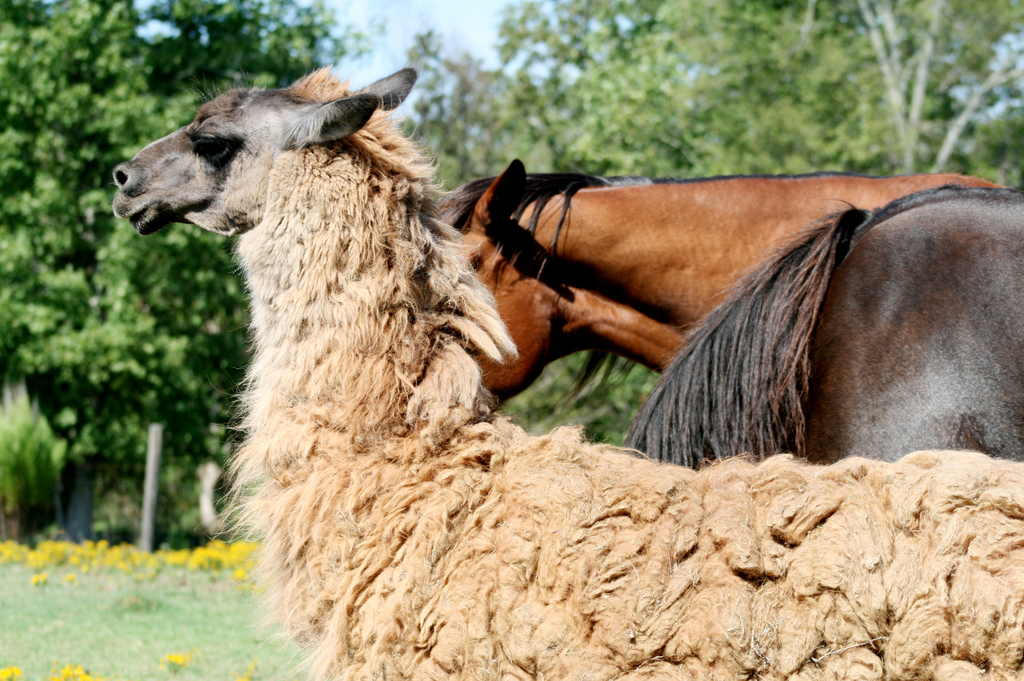

In [385]:
Image.open(ds_path)#.size

In [389]:
Image.open(original_path).size

(1936, 1288)

In [395]:
os.listdir("../raw-openimages/annotations/correct-masks")[:4]

['32e60e0bbda3b4a2_m0pcr_7bd39abf.png',
 '13a6bf4eaf05914a_m0pcr_e333c920.png',
 '0c0ab65b1271dfd5_m01x_v_4f43b3f8.png',
 '3972c59257f56dc5_m01x_v_90ab1113.png']

In [397]:
mask = os.path.join("../raw-openimages/annotations/correct-masks", mask_path)

In [400]:
Image.open(mask).size

(1600, 1064)